In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import scipy.io
from tqdm import tqdm
from time import process_time 

## Load and visualize data

In [2]:
mat = scipy.io.loadmat('linear_svm.mat')
X_train = mat["X_train"]
X_test = mat["X_test"]
y_train = mat["labels_train"]
y_test = mat["labels_test"]

## Define gradient descent function
Soft-margin formulation of the problem

In [117]:
def gd(iter, X, C, y, w, b, prev_iter=0):
    t = prev_iter * X.shape[0]
    for _ in range(iter):
        for i in range(X.shape[0]):
            t += 1
            eta = 1 / t
            if y[i] * (np.dot(w, X[i]) + b) < 1:
                w = w - eta * (w - C * y[i] * X[i])
                b = b + eta * C * y[i]
            else:
                w = w - eta * w 

    return w, b

In [118]:
w = np.zeros([X_train.shape[1]])
b = 0
C = 5

train_acc = []
test_acc = []
# t1 = process_time()
for iter in tqdm(range(1000)):
    w, b = gd(1, X_train, C, y_train, w, b, prev_iter=iter)
# t2 = process_time()
    train_acc.append((np.sign(np.matmul(X_train, w) + b) == y_train.squeeze()).sum() / y_train.shape[0])
    test_acc.append((np.sign(np.matmul(X_test, w) + b) == y_test.squeeze()).sum() / y_test.shape[0])


100%|██████████| 1000/1000 [00:00<00:00, 1897.00it/s]


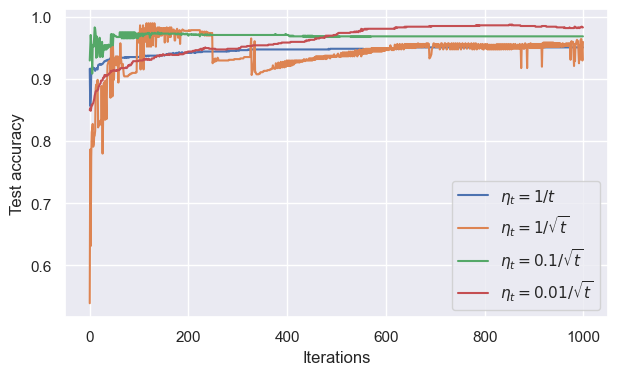

In [137]:
plt.figure()
plt.plot(test_acc_t)
plt.plot(test_acc_1)
plt.plot(test_acc_01)
plt.plot(test_acc_001)
plt.xlabel("Iterations")
plt.ylabel("Test accuracy")
plt.legend([r"$\eta_t=1/t$", r"$\eta_t=1/\sqrt{t}$", r"$\eta_t=0.1/\sqrt{t}$", r"$\eta_t=0.01/\sqrt{t}$"])
plt.rcParams["figure.figsize"] = (7,4)
plt.savefig("lr_sd.pdf")

In [119]:
train_acc_t = train_acc
test_acc_t = test_acc

In [116]:
train_acc_1 = train_acc
test_acc_1 = test_acc

In [113]:
train_acc_01 = train_acc
test_acc_01 = test_acc

In [110]:
train_acc_001 = train_acc
test_acc_001 = test_acc

In [107]:
# t2-t1

0.515625

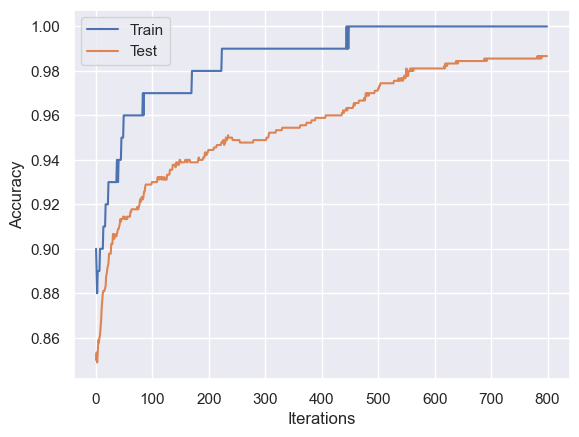

In [104]:
plt.figure()
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(["Train", "Test"])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.savefig("gd_acc.pdf")

## Evaluate model
On test set

In [105]:
print("************ Accuracy *****************")
(np.sign(np.matmul(X_test, w) + b) == y_test.squeeze()).sum() / y_test.shape[0]

************ Accuracy *****************


0.9866666666666667

In [95]:
np.save("w_SDP", w)
np.save("b_SDP", b)

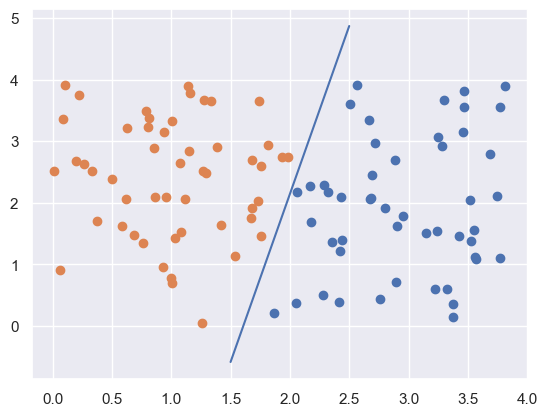

In [12]:
# Plot separation surface
plt.scatter(X_train[y_train.reshape(-1,)==1,0], X_train[y_train.reshape(-1,)==1,1])
plt.scatter(X_train[y_train.reshape(-1,)==-1,0], X_train[y_train.reshape(-1,)==-1,1])
plt.plot(np.linspace(1.5,2.5), np.linspace(1.5,2.5) * (-w[0]/w[1]) - b/w[1])